# Solvers ⚙️

In this exercise, you will investigate the effects of different `solvers` on `LogisticRegression` models.

👇 Run the code below

In [32]:
import pandas as pd

df = pd.read_csv("data.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality rating
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80,6
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80,7
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06,4
3,11.00,8.44,8.32,9.65,7.87,10.92,6.97,11.07,10.66,8.89,8
4,12.12,13.44,10.35,9.95,11.09,9.38,10.22,9.04,7.68,11.38,3


- The dataset consists of different wines 🍷
- The features describe different properties of the wines 
- The target 🎯 is a quality rating given by an expert

## 1. Target engineering

In this section, you are going to transform the ratings into a binary target.

👇 How many observations are there for each rating?

In [33]:
import seaborn as sns

df['quality rating'].value_counts().sort_index()

1     10090
2     10030
3      9838
4      9928
5     10124
6      9961
7      9954
8      9977
9      9955
10    10143
Name: quality rating, dtype: int64

👇 Create `y` by transforming the target into a binary classification task where quality ratings below 6 are bad [0], and ratings of 6 and above are good [1]

In [34]:
df['quality'] = [1 if obs>=6 else 0 for obs in df['quality rating']]
df['quality']

0        1
1        1
2        0
3        1
4        0
        ..
99995    1
99996    1
99997    0
99998    1
99999    0
Name: quality, Length: 100000, dtype: int64

👇 Check the class balance of the new binary target

In [35]:
df['quality'].value_counts()

0    50010
1    49990
Name: quality, dtype: int64

Create your `X` by scaling the features. This will allow for fair comparison of different solvers.

In [36]:
X = df.loc[:,'fixed acidity':'alcohol']
y = df.quality

<AxesSubplot:>

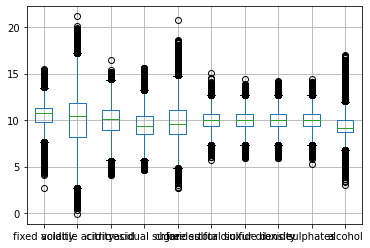

In [64]:
X.boxplot()

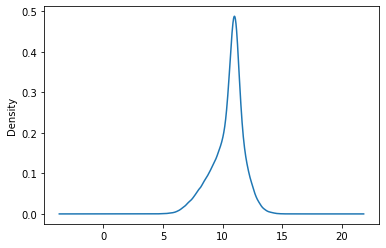

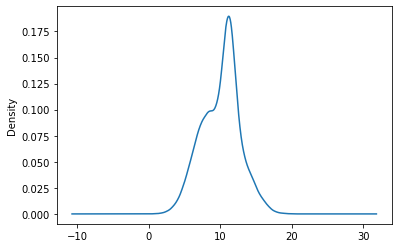

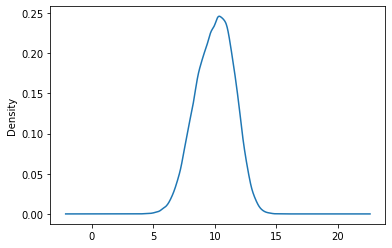

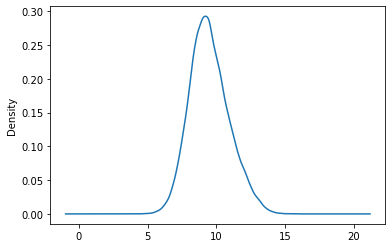

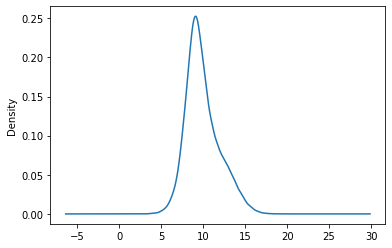

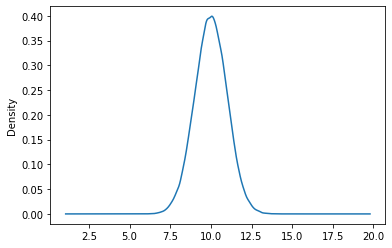

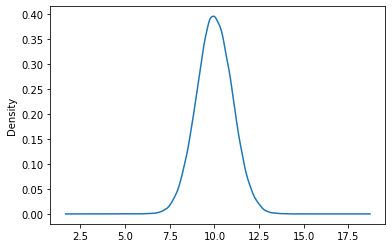

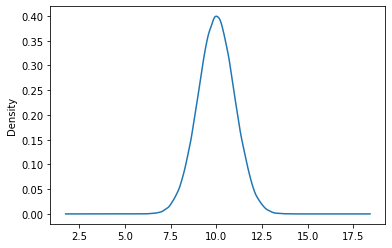

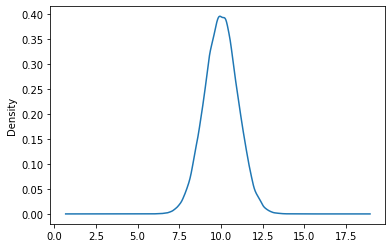

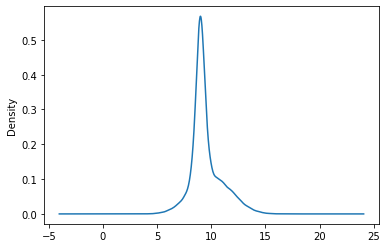

In [58]:
import matplotlib.pyplot as plt

for k in X.columns:
    X[k].plot.density()
    plt.show()

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

trans = RobustScaler()
trans.fit(X)
X_scaled = pd.DataFrame(trans.transform(X), columns = X.columns)
X_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,-0.884354,-1.231405,-1.252294,0.410526,-1.088,-0.634328,-0.162963,-0.358209,0.251852,-0.282443
1,-0.489796,-0.440771,-0.151376,-0.531579,0.236,-2.305970,-0.222222,-0.738806,-0.570370,-0.282443
2,-0.122449,0.074380,0.344037,0.831579,-0.212,0.313433,1.081481,0.932836,0.992593,-0.083969
3,0.156463,-0.550964,-0.811927,0.136842,-0.676,0.686567,-2.244444,0.798507,0.488889,-0.213740
4,0.918367,0.826446,0.119266,0.294737,0.612,-0.462687,0.162963,-0.716418,-1.718519,1.687023
...,...,...,...,...,...,...,...,...,...,...
99995,-2.612245,-1.639118,-0.844037,-0.415789,-0.060,0.798507,-1.200000,0.664179,1.792593,-0.137405
99996,-0.136054,-0.242424,-0.119266,-0.215789,0.084,0.029851,0.644444,0.955224,-0.318519,-0.152672
99997,-0.367347,0.148760,0.756881,1.247368,-0.276,-0.723881,-0.051852,-0.104478,0.029630,-0.389313
99998,-2.394558,-1.787879,-1.403670,-0.257895,-0.428,-0.186567,1.074074,0.156716,-1.244444,0.206107


## 2. LogisticRegression solvers

👇 Logistic Regression models can be optimized using different **solvers**. Find out 
- Which is the `fastest_solver` ?
- What can you say about their respective precision score?

`solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']`
 
For more information on these 5 solvers, check out [this stackoverflow thread](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
times = []
scores = []

for solver in solvers:
    lr = LogisticRegression(solver = solver, max_iter=300)
    cv = cross_validate(lr, X_scaled, y)
    times.append(cv['fit_time'].sum()+cv['score_time'].sum())
    scores.append(cv['test_score'].mean())
times

[1.1167571544647217,
 0.26512742042541504,
 0.7268712520599365,
 3.570455312728882,
 4.274127244949341]

In [67]:
scores

[0.8611000000000001,
 0.8611000000000001,
 0.86111,
 0.8611000000000001,
 0.8611000000000001]

In [41]:
# YOUR ANSWER
fastest_solver = "lbfgs"

<details>
    <summary>☝️ Intuition</summary>

All solvers should produce similar precision scores because our cost-function is "easy" enough to have a global minimum which is found by all 5 solvers. For very complex cost-functions such as in Deep Learning, different solvers may stopping at different values of the loss function. 

</details> 

###  🧪 Test your code

In [42]:
from nbresult import ChallengeResult

result = ChallengeResult('solvers',
                         fastest_solver=fastest_solver
                         )
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/05-ML/04-Under-the-hood/02-Solvers
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 1 item

tests/test_solvers.py::TestSolvers::test_fastest_solver PASSED           [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/solvers.pickle

git commit -m 'Completed solvers step'

git push origin master


## 3. Stochastic Gradient Descent

Logistic Regression models can also be optimized via Stochastic Gradient Descent.

👇 Evaluate a Logistic Regression model optimized via **Stochastic Gradient Descent**. How do its precision score and training time compare to the performance of the models trained in section 2.?


<details>
<summary>💡 Hint</summary>

- If you are stuck, look at the [SGDClassifier doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)!

</details>



In [68]:
from sklearn.linear_model import SGDClassifier

cv_SG = cross_validate(estimator = SGDClassifier(), X = X_scaled, y = y)
cv_SG['fit_time'].sum()+cv_SG['score_time'].sum(), cv_SG['test_score'].mean()


(0.5362422466278076, 0.85967)

☝️ The SGD model should have the shortest training time, for similar performance. This is a direct effect of performing each epoch of the Gradient Descent on a single data point.

## 4. Predictions

👇 Use the best model to predict the binary quality (0 or 1) of the following wine. Store your
- `predicted_class`
- `predicted_proba_of_class`

In [69]:
new_data = pd.read_csv('new_data.csv')

new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,9.54,13.5,12.35,8.78,14.72,9.06,9.67,10.15,11.17,12.17


In [97]:
sgclass = SGDClassifier(loss='log')

sgclass.fit(X_scaled,y)

new_X_scaled = trans.transform(new_data)

predicted_class = sgclass.predict(new_X_scaled)
predicted_proba_of_class = sgclass.predict_proba(new_X_scaled)[:,0][predicted_class]

/Users/humbert/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/Users/humbert/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


# 🏁  Check your code and push your notebook

In [98]:
from nbresult import ChallengeResult

result = ChallengeResult('new_data_prediction',
    predicted_class=predicted_class,
    predicted_proba_of_class=predicted_proba_of_class
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/05-ML/04-Under-the-hood/02-Solvers
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 2 items

tests/test_new_data_prediction.py::TestNewDataPrediction::test_predicted_class PASSED [ 50%]
tests/test_new_data_prediction.py::TestNewDataPrediction::test_predicted_proba PASSED [100%]

============================== 2 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/new_data_prediction.pickle

git commit -m 'Completed new_data_prediction step'

git push origin master
